This project/exploration is intended to study the effect of temperature on the sales of cerveja. Data from Kaggle. Beer consumption in Sao Paulo, Brazil for 2015.

In [1]:
#import packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
data = pd.read_csv("Consumo_cerveja.csv")

In [3]:
#what am I working with? what are the columns, variables, what needs fixed?
data.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900


In [4]:
data.describe()

,Final de Semana,Consumo de cerveja (litros)
count,365.000000,365.000000
mean,0.284932,25.401367
std,0.452001,4.399143
min,0.000000,14.343000
25%,0.000000,22.008000
50%,0.000000,24.867000
75%,1.000000,28.631000
max,1.000000,37.937000


In [5]:
#first translate column names
data.columns = ['Date', 'Median_Temp', 'Min_Temp', 'Max_Temp', 'Precip', 'Weekend', 'Beer_Consumption']

In [6]:
data.dtypes

Date                 object
Median_Temp          object
Min_Temp             object
Max_Temp             object
Precip               object
Weekend             float64
Beer_Consumption    float64
dtype: object

In [7]:
#need to change objects into floats. Almost certainly a problem with the comma instead of decimal
for a in range(len(data.Median_Temp)):
    if type(data.Median_Temp[a]) is str:
        data.Median_Temp[a] = data.Median_Temp[a].replace(',','.')

/home/woswald/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [8]:
data.Median_Temp = data.Median_Temp.astype('float')

In [9]:
for a in range(len(data.Min_Temp)):
    if type(data.Min_Temp[a]) is str:
        data.Min_Temp[a] = data.Min_Temp[a].replace(',','.')

/home/woswald/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
for a in range(len(data.Max_Temp)):
    if type(data.Max_Temp[a]) is str:
        data.Max_Temp[a] = data.Max_Temp[a].replace(',','.')

/home/woswald/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
for a in range(len(data.Precip)):
    if type(data.Precip[a]) is str:
        data.Precip[a] = data.Precip[a].replace(',','.')

/home/woswald/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
data.Min_Temp = data.Min_Temp.astype('float')
data.Max_Temp = data.Max_Temp.astype('float')
data.Precip = data.Precip.astype('float')

In [13]:
data.head()

,Date,Median_Temp,Min_Temp,Max_Temp,Precip,Weekend,Beer_Consumption
0,2015-01-01,27.30,23.9,32.5,0.0,0.0,25.461
1,2015-01-02,27.02,24.5,33.5,0.0,0.0,28.972
2,2015-01-03,24.82,22.4,29.9,0.0,1.0,30.814
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799
4,2015-01-05,23.82,21.0,28.3,0.0,0.0,28.900


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 7 columns):
Date                365 non-null object
Median_Temp         365 non-null float64
Min_Temp            365 non-null float64
Max_Temp            365 non-null float64
Precip              365 non-null float64
Weekend             365 non-null float64
Beer_Consumption    365 non-null float64
dtypes: float64(6), object(1)
memory usage: 51.5+ KB


In [15]:
#dataframe seems to have a large number of extra null rows, let's drop these
data = data.dropna()

In [16]:
data.Date = pd.to_datetime(data.Date)

In [17]:
data.info() #that's taken care of, let's sort through what's here

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 7 columns):
Date                365 non-null datetime64[ns]
Median_Temp         365 non-null float64
Min_Temp            365 non-null float64
Max_Temp            365 non-null float64
Precip              365 non-null float64
Weekend             365 non-null float64
Beer_Consumption    365 non-null float64
dtypes: datetime64[ns](1), float64(6)
memory usage: 22.8 KB


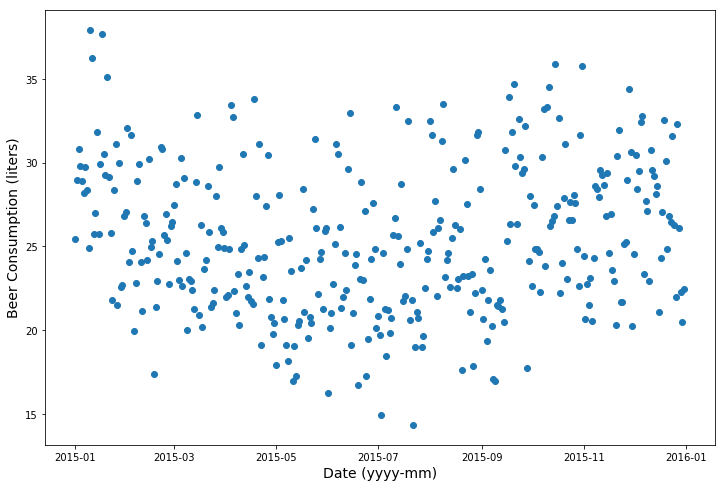

In [18]:
#my assumption is that we'll see a spike in beer consumption on the weekends, but let's plot the consumption
plt.figure(1, figsize=(12, 8))
plt.plot_date(data.Date, data.Beer_Consumption, xdate=True)
plt.xlabel('Date (yyyy-mm)', fontsize=14)
plt.ylabel('Beer Consumption (liters)', fontsize=14)

plt.show()

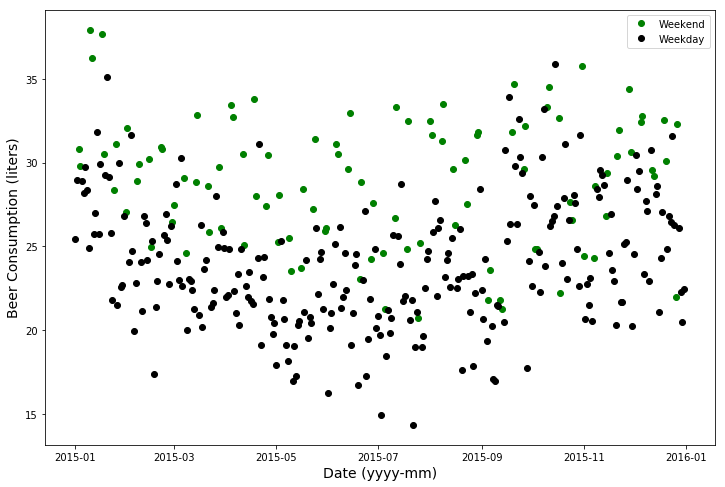

In [19]:
#let's plot the weekdays vs weekends
plt.figure(1, figsize=(12, 8))
plt.plot_date(data.Date[data.Weekend==1], data.Beer_Consumption[data.Weekend==1], xdate=True, color='green', label='Weekend')
plt.plot_date(data.Date[data.Weekend==0], data.Beer_Consumption[data.Weekend==0], xdate=True, color='black', label="Weekday")
plt.xlabel('Date (yyyy-mm)', fontsize=14)
plt.ylabel('Beer Consumption (liters)', fontsize=14)
plt.legend(loc=0)
plt.show()

So far, we've seen that the consumption tends to be higher on weekends than weekdays at a first glance. There are still some interesting outliers here. Weekend consumption also stays relatively high during the year while weekday consumption drops through southern winter

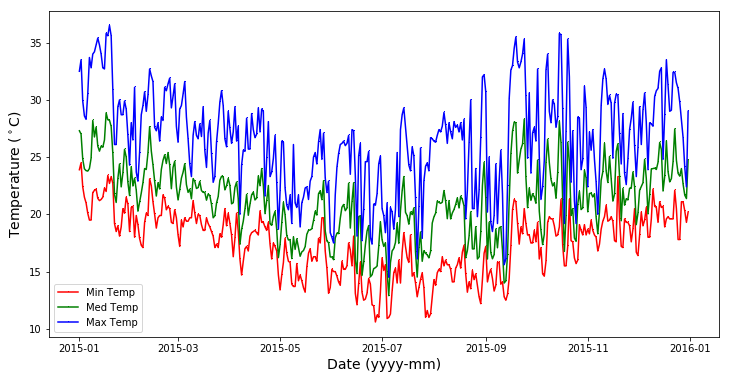

In [20]:
plt.figure(1, figsize=(12, 6))
plt.plot_date(data.Date, data.Min_Temp, xdate=True, color='red', label='Min Temp', linestyle = '-', marker=',')
plt.plot_date(data.Date, data.Median_Temp, xdate=True, color='green', label='Med Temp', linestyle = '-', marker=',')
plt.plot_date(data.Date, data.Max_Temp, xdate=True, color='blue', label='Max Temp', linestyle = '-', marker=',')
plt.legend(loc=0)
plt.ylabel(r'Temperature ($^\circ$C)', fontsize=14)
plt.xlabel('Date (yyyy-mm)', fontsize=14)
plt.show()

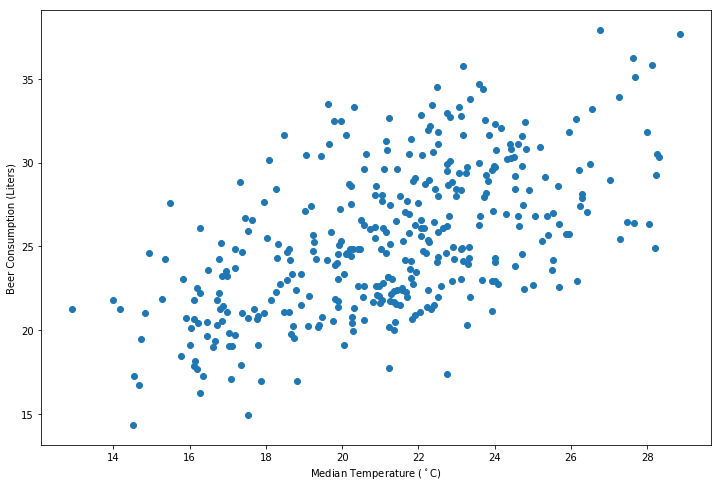

In [21]:
plt.figure(1, figsize=(12, 8))
plt.scatter(data.Median_Temp, data.Beer_Consumption)
plt.ylabel('Beer Consumption (Liters)', fontsize=14)
plt.xlabel(r'Median Temperature ($^\circ$C)', fontsize=14)
plt.show()

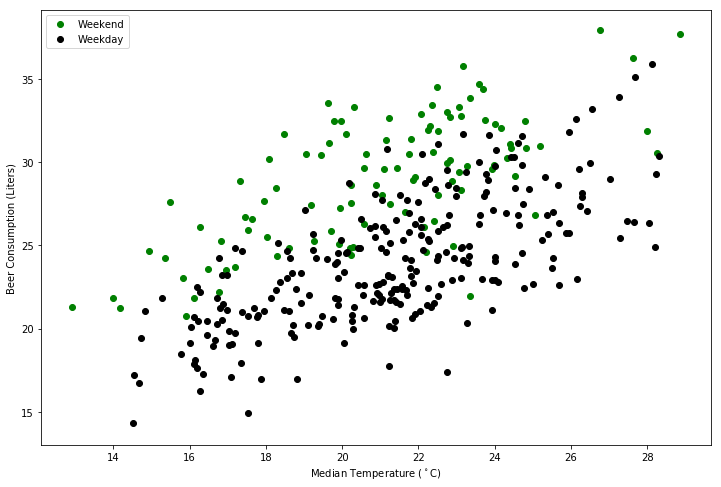

In [22]:
plt.figure(1, figsize=(12, 8))
plt.scatter(data.Median_Temp[data.Weekend==1], data.Beer_Consumption[data.Weekend==1], color='green', label='Weekend')
plt.scatter(data.Median_Temp[data.Weekend==0], data.Beer_Consumption[data.Weekend==0], color='black', label='Weekday')
plt.ylabel('Beer Consumption (Liters)', fontsize=14)
plt.xlabel(r'Median Temperature ($^\circ$C)', fontsize=14)
plt.legend(loc=0)
plt.show()

So we can see an interesting trend that people from Sao Paulo tend to drink more on the weekends, and tend to drink more when its hotter. Can we come up with relations for these two groups? What about the outlier points? How does precipitation affect this trend?

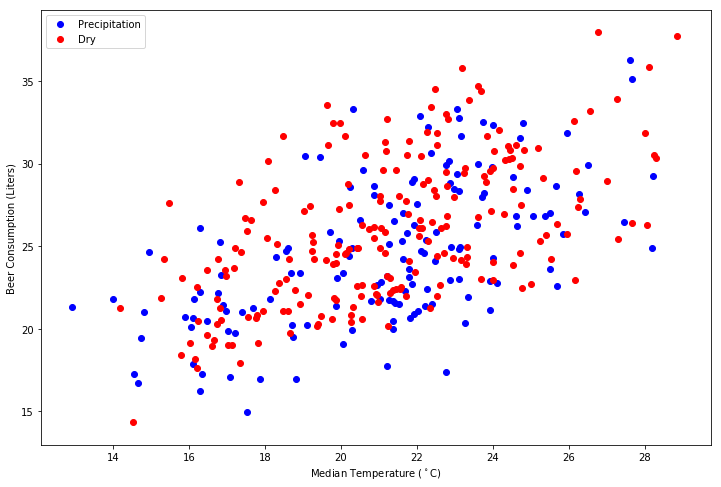

In [23]:
plt.figure(1, figsize=(12, 8))
plt.scatter(data.Median_Temp[data.Precip>0], data.Beer_Consumption[data.Precip>0], color='blue', label='Precipitation')
plt.scatter(data.Median_Temp[data.Precip==0], data.Beer_Consumption[data.Precip==0], color='red', label='Dry')
plt.ylabel('Beer Consumption (Liters)', fontsize=14)
plt.xlabel(r'Median Temperature ($^\circ$C)', fontsize=14)
plt.legend(loc=0)
plt.show()

I don't see much in the way of clusters by eye for whether the rain has any effect. I'd argue that it largely doesn't affect the amount of beer consumption.

In reality, 365 data points isn't really big data. It almost certainly doesn't warrant breaking out the machine learning, but that never stopped anyone before. Let's do a few quick fits before we jump in too far.

In [29]:
p_we = np.polyfit(data.Median_Temp[data.Weekend==1], data.Beer_Consumption[data.Weekend==1], 1)
p_wd = np.polyfit(data.Median_Temp[data.Weekend==0], data.Beer_Consumption[data.Weekend==0], 1)

temps = np.arange(10, 35, 0.1)
pred_we_consume = np.polyval(p_we, temps)
pred_wd_consume = np.polyval(p_wd, temps)



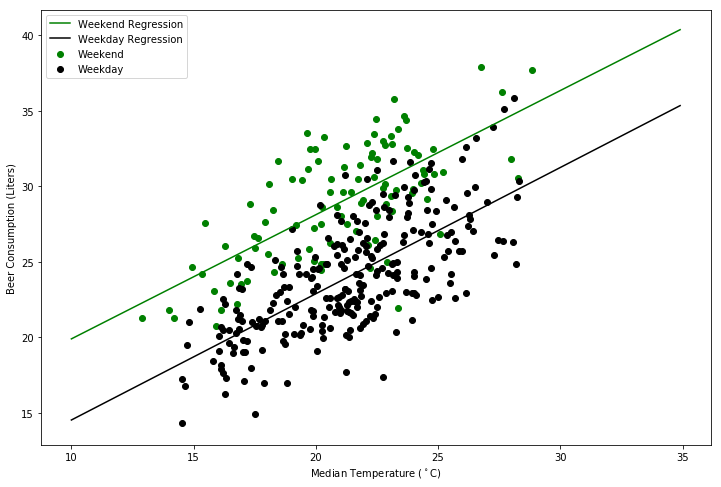

In [30]:
plt.figure(1, figsize=(12, 8))
plt.scatter(data.Median_Temp[data.Weekend==1], data.Beer_Consumption[data.Weekend==1], color='green', label='Weekend')
plt.plot(temps, pred_we_consume, color='green', label='Weekend Regression')
plt.scatter(data.Median_Temp[data.Weekend==0], data.Beer_Consumption[data.Weekend==0], color='black', label='Weekday')
plt.plot(temps, pred_wd_consume, color='black', label='Weekday Regression')
plt.ylabel('Beer Consumption (Liters)', fontsize=14)
plt.xlabel(r'Median Temperature ($^\circ$C)', fontsize=14)
plt.legend(loc=0)
plt.show()

In [31]:
print(p_we, p_wd)

[ 0.82276971 11.6686074 ] [0.83661391 6.15475405]


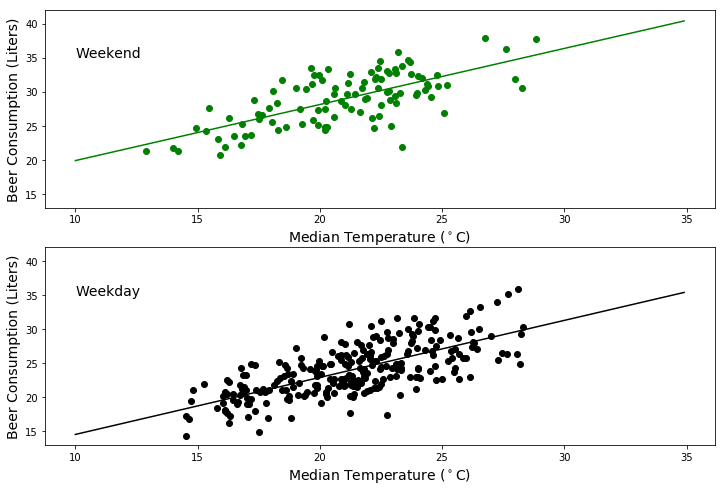

In [35]:
plt.figure(1, figsize=(12, 8))
plt.subplot(211)
plt.scatter(data.Median_Temp[data.Weekend==1], data.Beer_Consumption[data.Weekend==1], color='green', label='Weekend')
plt.plot(temps, pred_we_consume, color='green', label='Weekend Regression')
plt.text(10, 35, 'Weekend', fontsize=14)
plt.ylabel('Beer Consumption (Liters)', fontsize=14)
plt.xlabel(r'Median Temperature ($^\circ$C)', fontsize=14)
plt.ylim(13, 42)
plt.subplot(212)
plt.scatter(data.Median_Temp[data.Weekend==0], data.Beer_Consumption[data.Weekend==0], color='black', label='Weekday')
plt.plot(temps, pred_wd_consume, color='black', label='Weekday Regression')
plt.text(10, 35, 'Weekday', fontsize=14)
plt.ylabel('Beer Consumption (Liters)', fontsize=14)
plt.xlabel(r'Median Temperature ($^\circ$C)', fontsize=14)
plt.ylim(13, 42)
#plt.legend(loc=0)
plt.show()

There is a fair amount to unpack from this simple linear regression from numpy. Essentially, the weekend and weekday trends have roughly the same slope, meaning that temperature dependence of beer consumption is very similar regardless of the time of the week. People in Sao Paulo tend to drink an extra ~0.8 liters of beer per degree celsius increase in temperature. By default, however, people tend to drink an extra ~5.5 liters of beer on the weekend compared to the weekday.

The limits of the relations are also important to consider as well. The range of median temperatures are about 14-29 degrees celsius. Obviously we can't use this data to predict the consumption when the temperatures are just any value. Reasonable physical limits tell us people can't consume a negative amount of beer, nor will humans continue to consume more beer as the temperature turns to boiling. I've reasonably chosen to plot the linear regressions between 10 and 35 degrees celsius. According to Sao Paulo's wikipedia page (https://en.wikipedia.org/wiki/S%C3%A3o_Paulo#Climate), the Brazilian National Institute of Meteorology states the record high as 37.8 and the record low as 0.8 degrees celsius. Since we're using a median temperature, we likely won't hit the highest high, or lowest low, making 10 a reasonable low value and 35 a reasonable high value.

Given more data, fitting to particular regions of temperature might prove interesting as well. As is, a linear fit seems to do well enough.

Now let's make good on that promise of ML. Just for fun, we can do the same thing as above, but with scikit-learn.

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [54]:
temp_wd_x, cons_wd_y = data.Median_Temp[data.Weekend==0].values, data.Beer_Consumption[data.Weekend==0].values
temp_wd_xTrain, temp_wd_xTest, cons_wd_yTrain, cons_wd_yTest = train_test_split(temp_wd_x, cons_wd_y, test_size=0.2, random_state=16)
temp_wd_xTrain = np.reshape(temp_wd_xTrain, (len(temp_wd_xTrain), 1))
temp_wd_xTest = np.reshape(temp_wd_xTest, (len(temp_wd_xTest), 1))

In [51]:
regr = LinearRegression()
regr.fit(temp_wd_xTrain, cons_wd_yTrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [55]:
cons_wd_yPred = regr.predict(temp_wd_xTest)

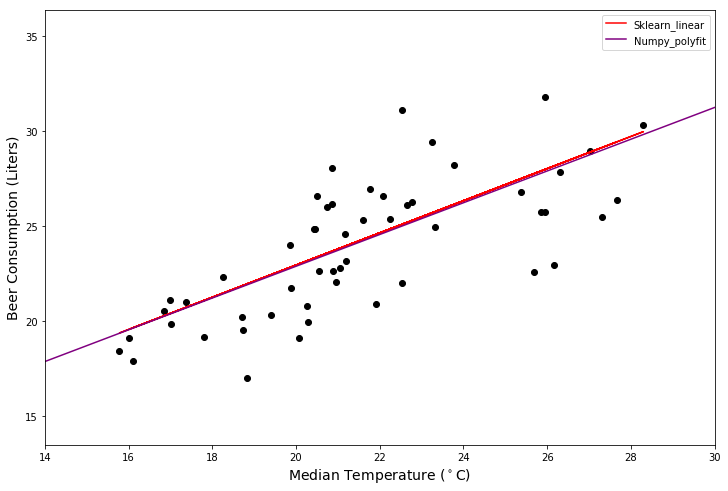

In [58]:
plt.figure(1, figsize=(12, 8))
plt.scatter(temp_wd_xTest, cons_wd_yTest, color='k')
plt.plot(temp_wd_xTest, cons_wd_yPred, color='r', linestyle='-', label='Sklearn_linear')
plt.plot(temps, pred_wd_consume, color='purple', label='Numpy_polyfit')
plt.ylabel('Beer Consumption (Liters)', fontsize=14)
plt.xlabel(r'Median Temperature ($^\circ$C)', fontsize=14)
plt.xlim(14, 30)
plt.legend(loc=0)
plt.show()

Now, these two relations are nearly indistinquishable, which is good considering that we trained with 80% of the data and are now looking at our 20% test set.

One more thing we might look at is with regard to holidays in Sao Paulo. We don't yet have this info in our dataframe so I need to grab it from elsewhere. Here are the holidays according to https://www.officeholidays.com/countries/brazil/2015

In [73]:
holi = ['2015-01-01', '2015-02-16', '2015-02-17', '2015-02-18', '2015-04-03', '2015-04-21', '2015-05-01', '2015-06-04', '2015-07-09', '2015-09-07', '2015-10-12', '2015-10-30', '2015-11-01', '2015-11-02', '2015-11-15', '2015-11-20', '2015-12-25']
holi = [pd.Timestamp(a) for a in holi]

In [60]:
data['Holiday'] = np.zeros(365)

In [74]:
for a in range(len(data.Date)):
    if data.Date[a] in holi:
        data.Holiday[a] = 1

/home/woswald/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [75]:
data.head()

,Date,Median_Temp,Min_Temp,Max_Temp,Precip,Weekend,Beer_Consumption,Holiday
0,2015-01-01,27.30,23.9,32.5,0.0,0.0,25.461,1.0
1,2015-01-02,27.02,24.5,33.5,0.0,0.0,28.972,0.0
2,2015-01-03,24.82,22.4,29.9,0.0,1.0,30.814,0.0
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799,0.0
4,2015-01-05,23.82,21.0,28.3,0.0,0.0,28.900,0.0


With those few dates added we can look at where these holidays appear in our weekend and weekday samples.